In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/alldata_1_for_kaggle.csv', encoding="latin-1")
df.head(3)

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...


In [2]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.rename({'0': 'target', 'a': 'feature'}, axis = 1)
df.head(3)

,target,feature
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...


In [3]:
"""
Now we do Data Preprocessing.
"""
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

regexp = RegexpTokenizer("[\w']+")

def convert_to_lowercase(text):
    return text.lower()
def remove_whitespace(text):
    return text.strip()
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") 
    return text.translate(str.maketrans("", "", punct_str))
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)
def remove_http(text):
    http = "https?://\S+|www\.\S+" 
    pattern = r"({})".format(http) 
    return re.sub(pattern, "", text)
# Stopwords
stops = stopwords.words("english") 
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] 
allstops = stops + addstops
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

In [4]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) 
    text = re.sub('\[.*?\]', '', text) 
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_stopwords(text)
    text = discard_non_alpha(text)
    return text

In [5]:
df['feature'] = df['feature'].apply(text_normalizer)

In [6]:
"""from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), max_features=15000, smooth_idf=True, sublinear_tf=True)
vectorizer.fit(df['feature'])
df_features = vectorizer.transform(df['feature'])
df_target = df['target']

df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_features.toarray(), df_target, test_size = 0.2, random_state=42)"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), max_features=15000, smooth_idf=True, sublinear_tf=True)
df_feature = vectorizer.fit_transform(df['feature'])
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_feature, df['target'], test_size=0.2, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

#bei max_depth = 9, schon 99% accuracy
dt_model = DecisionTreeClassifier()
dt_model.fit(df_features_train, df_target_train)
target_prediction = dt_model.predict(df_features_test)

In [8]:
"""from sklearn.ensemble import RandomForestClassifier

dt_model_rfc = RandomForestClassifier()
dt_model_rfc.fit(df_features_train, df_target_train)
target_prediction_rfc = dt_model_rfc.predict(df_features_test)"""

In [15]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(df_target_test, target_prediction))

                precision    recall  f1-score   support

  Colon_Cancer       1.00      1.00      1.00       517
   Lung_Cancer       1.00      1.00      1.00       407
Thyroid_Cancer       1.00      1.00      1.00       590

      accuracy                           1.00      1514
     macro avg       1.00      1.00      1.00      1514
  weighted avg       1.00      1.00      1.00      1514



In [10]:
accuracy_score = accuracy_score(df_target_test, target_prediction)

In [11]:
accuracy_score

0.988110964332893

array([[517,   0,   0],
       [  5, 400,   2],
       [  6,   5, 579]])

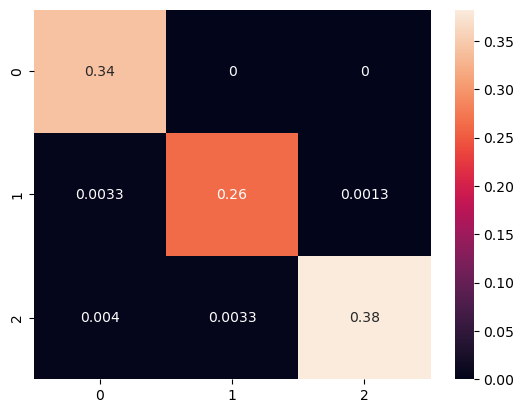

In [12]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(df_target_test, target_prediction)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True)
cf_matrix

[Text(0.5, 0.875, 'x[13635] <= 0.011\ngini = 0.664\nsamples = 6056\nvalue = [2063, 1773, 2220]'),
 Text(0.25, 0.625, 'x[7859] <= 0.032\ngini = 0.623\nsamples = 4292\nvalue = [1855, 1734, 703]'),
 Text(0.125, 0.375, 'x[9503] <= 0.005\ngini = 0.568\nsamples = 3029\nvalue = [1787, 582, 660]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[9415] <= 0.006\ngini = 0.164\nsamples = 1263\nvalue = [68, 1152, 43]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[9504] <= 0.013\ngini = 0.246\nsamples = 1764\nvalue = [208, 39, 1517]'),
 Text(0.625, 0.375, 'x[4029] <= 0.046\ngini = 0.149\nsamples = 1630\nvalue = [95, 35, 1500]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[14218] <= 0.027\ngini = 0.272\nsamples = 134\nvalue = [113, 4, 17]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

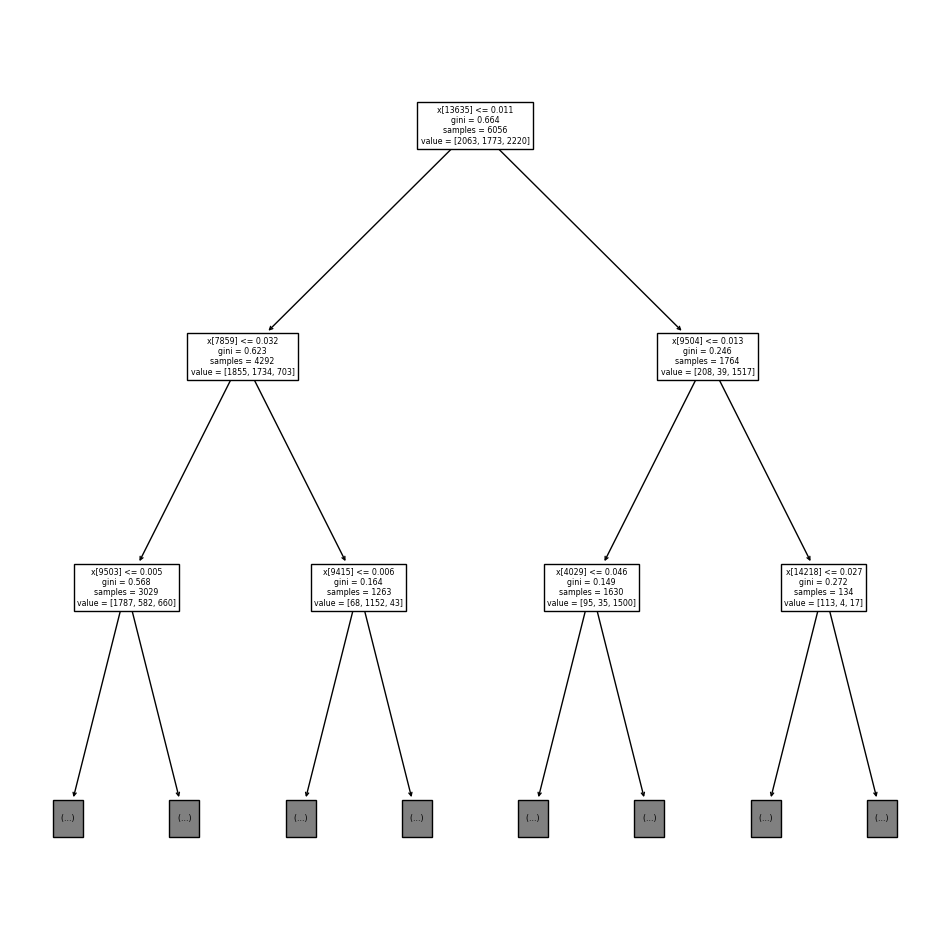

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plot_tree(dt_model, max_depth=2)